# Language Processing 1 (fall 2023)

## Assignment 1: assigned on October 5, 2023  and  to be returned on October 19, 2023, 23:55.

#### Your solutions will be evaluated in a holistic way. The percentages assigned to the exercises are provided to give you an idea of the time/effort it might take to solve them.  

## Exercise 1 (35%):

 - 1.1 (5%) Download from https://www.gutenberg.org/cache/epub/41/pg41.txt  (the file's encoding is utf-8)   "The Sleepy hollow" and write a new file "sleepy.txt" which only contains the text following the line "*** START OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW \*\*\*" and preceding the line "*** END OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***". 
 

In [1]:
# Insert your code below:
import requests as req
#we create a variable to store the text from the url
sleepytext = req.get('https://www.gutenberg.org/cache/epub/41/pg41.txt')
sleepytext = sleepytext.text
sleepytext = sleepytext.split('\n')
#we create a new file and write the text from the url into it
with open('sleepy.txt', 'w') as f:
    #we remove the first 23 lines and the last 352 lines, in order to satisfy the assignment requirements
    linesSleepytext = sleepytext[23:-352] #found out limits of the text by looking at the raw text file
    f.writelines(linesSleepytext)

 - 1.2 (15%) Write your own tokenizer and stemmer for English and apply them to  "sleepy.txt". You must use regular expressions and the results must be written to the files "tok.txt" and "stem.txt". Comment your programs.

In [2]:
# insert your code below. TIP: write a function my_tokenizer(text,ud_text) and  a function 
# my_stemmer(text,ud_text) and then call the former with "sleepy.txt" and the latter with "tok.txt".
import re
import requests
def my_tokenizer (text):
    #we iterate through the text
    words = text.read().split()
    
    return words

def my_stemmer(text):
    text = text.read()
    word_stems = []
    patterns = [
        r'ed$', # Past tense
        r'ing$', # Present participle
        r'es$', # 3rd person singular
        r's$', # Plural
    ]
    #we iterate over the patterns
    for pattern in patterns:
        #we iterate through the text with the pattern from the loop before
        for word in text.split():
            #if the word matches the pattern we return the stem form
            if re.search(pattern, word):
                word_stems.append(re.sub(pattern, '', word))
    return word_stems
#we create both of the files required for the exercise 
with open('tok.txt', 'w', encoding='utf-8') as f:
    with open('sleepy.txt', 'r') as sleepytext:
        #we pass the function the sleepy.txt and write the output to the new file
        f.write(str(my_tokenizer(sleepytext)))
with open('stem.txt', 'w', encoding='utf-8') as f:
    with open('sleepy.txt', 'r') as sleepytext:
        #we pass the function the sleepy.txt and write the output to the new file
        f.write(str(my_stemmer(sleepytext)))

 -  1.3 (5%) Run on sleepy.txt the  NLTK word-tokenizer. Describe shortly the differences between the results produced by your tokenizer and those by the NLTK word-tokenize.
Add your description below:

In [3]:
import nltk

with open('sleepy.txt', 'r') as text:
    tokenized_text = my_tokenizer(text)
with open('sleepy.txt', 'r') as f:
    text = f.read()
    tokenized_sentences = nltk.sent_tokenize(text)

    tokenized_words = []
    for sentence in tokenized_sentences:
        words = nltk.word_tokenize(sentence)
        tokenized_words.extend(words)

In [4]:
# add your code hereunder:
from nltk.stem import LancasterStemmer 
import nltk.tokenize
stemmer = LancasterStemmer()
with open('sleepy.txt', 'r') as f:
    text = f.read()
    tokenized_sentences = nltk.sent_tokenize(text)

    tokenized_words = []
    for sentence in tokenized_sentences:
        words = nltk.word_tokenize(sentence)
        tokenized_words.extend(words)
    stemmed_words = [stemmer.stem(word) for word in tokenized_words]
with open('LanStemSleepy.txt', 'w', encoding='utf-8') as f:
    f.write(str(stemmed_words))

 - 1.4b Describe shortly the differences between the results produced by your stemmer on sleepy.txt and those returned by the NLTK  Lancaster stemmer applied to the same text. Add your description below:

Comment: 
- Clearly the difference is huge, the Lancaster Stemmer has a vast and wide consideration for several prefixes and suffixes. 
- If compared to mine which has 4 patterns, it is a bit overwhelming, if taken in account together with the nltk tokenizer the results are excellent, while mine does work but it is no where near to nltk's power.

## Exercise 2 (15%): 

 - Normalize  and PoS-tag the text  "sleepy.txt" with the NLTK Penn PoS tagger and the Universal Dependency PoS tagger (5%). Explain the differences between the two tagsets and in which cases you think it would be best to use the Penn PoS tagger and in which cases the universal Dependency one (10%). 

In [5]:
# insert and run your code calling the two pos-tags, below.
import nltk
from nltk import pos_tag
#we open, read the file, and tokenize it.
with open('sleepy.txt', 'r', encoding='utf-8') as f:
    text = f.read()
sentences = nltk.sent_tokenize(text)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
#we invoke the pos_tag with the two tagsets.
penn_pos_tagged_sentences = [pos_tag(sentence) for sentence in tokenized_sentences] 
universal_pos_tagged_sentences = [pos_tag(sentence, tagset = 'universal') for sentence in tokenized_sentences]
#write the tags to the required files.
with open('penn_pos_tagged_sentences.txt', 'w', encoding='utf-8') as f:
    f.write(str(penn_pos_tagged_sentences))
with open('universal_pos_tagged_sentences.txt', 'w', encoding='utf-8') as f:
    f.write(str(universal_pos_tagged_sentences))

 - Insert your explanation about the differences between the two tagsets and your thoughts about their use, below:

EXPLANATION:
- The main difference:
    - The penn pos tagger is very good if fine-grained linguistic analysis is needed when working with the English language.
    - The universal pos tagger is very good if cross-linguistic analysis is being done.
- So as a summary, I believe its important to be conscious about the analysis we have at hand.

## Exercise 3 (15%):

 - 3.1 (5%) Calculate, and print out: a)  the absolute word frequency of the 20 most frequent words in "sleepy.txt", b) and their relative frequency. c) Plot the cumulative frequency of the 20 words.

20 Most Frequent Words:
,: Absolute Frequency: 1069, Relative Frequency: 0.0765
the: Absolute Frequency: 867, Relative Frequency: 0.0621
of: Absolute Frequency: 597, Relative Frequency: 0.0427
and: Absolute Frequency: 507, Relative Frequency: 0.0363
a: Absolute Frequency: 351, Relative Frequency: 0.0251
.: Absolute Frequency: 318, Relative Frequency: 0.0228
his: Absolute Frequency: 245, Relative Frequency: 0.0175
to: Absolute Frequency: 242, Relative Frequency: 0.0173
in: Absolute Frequency: 234, Relative Frequency: 0.0168
was: Absolute Frequency: 202, Relative Frequency: 0.0145
;: Absolute Frequency: 174, Relative Frequency: 0.0125
he: Absolute Frequency: 153, Relative Frequency: 0.0110
with: Absolute Frequency: 143, Relative Frequency: 0.0102
that: Absolute Frequency: 115, Relative Frequency: 0.0082
by: Absolute Frequency: 88, Relative Frequency: 0.0063
had: Absolute Frequency: 84, Relative Frequency: 0.0060
it: Absolute Frequency: 83, Relative Frequency: 0.0059
on: Absolute Frequenc

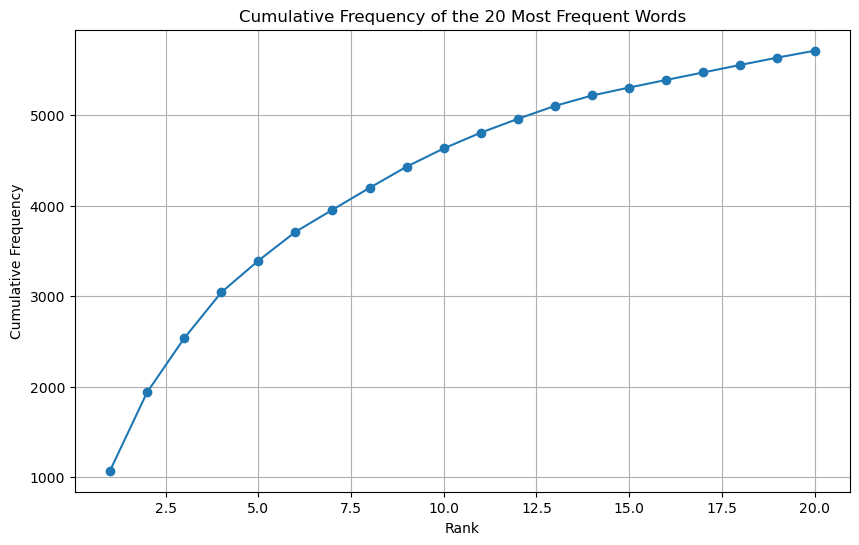

In [6]:
#insert your code below
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

with open('sleepy.txt', 'r') as f:
    text = f.read()
    #we tokenize and calculate both absolute frequency and the total amount of words
    word_tokens = nltk.word_tokenize(text)
    fdist = FreqDist(word_tokens)
    total_words = len(word_tokens)
    #we calculate the relative frequency, and the top 20 most frequent words in absolute frequency
    relative_frequency = {word: count / total_words for word, count in fdist.items()}
    top_words = fdist.most_common(20)
    print("20 Most Frequent Words:")
    #we create a for loop to print all the information we gathered
    for word, freq in top_words:
        print(f"{word}: Absolute Frequency: {freq}, Relative Frequency: {freq / total_words:.4f}")
    #we calculate the cumulative frequency
    cumulative_frequency = [count for word, count in top_words]
    cumulative_frequency = [sum(cumulative_frequency[:i+1]) for i in range(len(cumulative_frequency))]
    #we create and plot the cummulative frequency
    plt.figure(figsize = (10, 6))
    plt.plot(range(1, len(cumulative_frequency) + 1), cumulative_frequency, marker = 'o', linestyle = '-')
    plt.xlabel('Rank')
    plt.ylabel('Cumulative Frequency')
    plt.title('Cumulative Frequency of the 20 Most Frequent Words')
    plt.grid(True)
    plt.show()


 -  3.2 (10%) What do the three different measures tell us? Insert your answer below:


EXPLANATION:
- Absolute frequency tells the most repeating elements in the text.
- Relative frequency tells the percentage of ocurrence over the total size of the sample.
- Cummulative frequency (Cf) shows the behaviour of Zipf's law where the most frequent element has the lowest Cf.

## Exercise 4 (15%):

 - Find and print the lemmas of sleepy.txt after having normalised the text. Write the results in the file sleepy-lemmas.txt so that each word is separated by its lemma by a backsash, e.g. This/this is/be an/a example/example.

In [7]:
#insert your code below
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#we create a instance of the lemmatizer
wnl = WordNetLemmatizer()
#we create a function to translate penn pos tags to wordnet styled pos tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        #if an unknown tag is found it will be translated as NOUN tag -> 'n'
        return wordnet.NOUN
#we open sleepy.txt and create the output file sleepy-lemmas.txt
with open('sleepy.txt', 'r') as sleepytxt:
    with open('sleepy-lemmas.txt', 'w', encoding='utf-8') as sleepylemmas:
        text = sleepytxt.read()
        #we tokenize the text
        text_word_tokens = nltk.word_tokenize(text)
        #we penn pos tag it
        pos_tags = nltk.pos_tag(text_word_tokens)
        
        for token, pos_tag in pos_tags:
            #we translate the penn pos tags
            wordnet_pos = get_wordnet_pos(pos_tag)
            #we lemmatize using the wordnet tags
            lemma = wnl.lemmatize(token, wordnet_pos)
            #we write the lemmas to the txt file adding the backslash and a space to make it visually clear
            sleepylemmas.write(token + '/' + lemma.lower() + ' ')


## Exercise 5 (20%)

 -  5.1 (15%) Extend the pattern based tagger from the NLTK book and lesson 4 exercise to cover all pronouns, punctuation signs (tag ".", coordinating conjunctions (tag "CC"), modal auxiliary (tag "MD") and who-words (tag "WH"). Run the tagger om sleepy.txt and write the results in a file "my_sleepy-tagget.txt.  


In [8]:
#insert your code here
import nltk
#we open the sleepy file
with open('sleepy.txt', 'r') as sleepytxt:
    text = sleepytxt.read()
    #we tokenize the text
    tokens = nltk.word_tokenize(text)
#we expand the pattern based regex tagger to search for the elements required
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'[.,;:]', 'PS'),  # punctuation
    (r'^(?:[Mm]e|[Yy]ou|[Hh]im|[Hh]er|[Ii]t|[Uu]s|[Tt]hem)$', 'PRP'),  # object pronoun
    (r'^(?:[Mm]yself|[Yy]ourself|[Hh]imself|[Hh]erself|[Ii]tself|[Oo]urselves|[Tt]hemselves)$', 'PRP'),  # reflexive pronouns
    (r'^(?:[Ii]|[Yy]ou|[Hh]e|[Ss]he|[Ii]t|[Ww]e|[Tt]hey)$', 'PRP'),  # personal pronouns
    (r'^(?:[Mm]ine|[Yy]ours|[Hh]is|[Hh]ers|[Ii]ts|[Oo]urs|[Tt]heirs)$', 'PRP'),  # possessive pronoun
    (r'^(?:[Ww]hat|[Ww]here|[Ww]hen|[Ww]ho|[Ww]hom|[Ww]hich|[Ww]hy|[Ww]hose)$', 'WH'),  # who-words
    (r'^(and|but|or|for|nor|so|yet)$', 'CC'),  # coordinating conjunctions
    (r'^(?:[Cc]an|[Cc]ould|[Mm]ay|[Mm]ight|[Mm]ust|[Ss]hall|[Ss]hould|[Ww]ill|[Ww]ould)$', 'MD'), #Modal Auxiliary
    (r'.*', 'NN'),  # nouns (default)
]
#we create an instance of the nltk regex pattern with the patterns we created
regexp_tagger = nltk.RegexpTagger(patterns)
#we create the output file my-sleepy-tagged.txt
with open('my-sleepy-tagged.txt', 'w') as sleepytagged:
    #we create a for loop to iterate over the tuples
    for token in regexp_tagger.tag(tokens):
        #we write the information of the tuples as strings and a newline to the file
        sleepytagged.write(str(token) + '\n')


 -  5.2  (5%) Look at the obtained results and explain which word types are still not tagged correctly. Insert your explanation below:

EXPLANATION
- Even though I expanded severely the regex pattern search, it will still mistag certain words because it lacks the semantics to tag correctly content words such as 'Housewives' or 'Castles' which are tagged as a 'VBZ'.
- The conclusion I can draw from this is that the regex tagger can be useful to process text if the person working with it has in account the fact that content words will be mistagged at times.